In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
with open('input/8-input.txt') as f:
    coords = np.array([np.array(line.split(',')) for line in f.read().splitlines()], dtype=float)

In [2]:
D = squareform(pdist(coords, metric='euclidean'))

In [3]:
# Get upper triangular indices (k=1 excludes diagonal to avoid self-pairs)
i_upper, j_upper = np.triu_indices_from(D, k=1)
upper_values = D[i_upper, j_upper]

# Find the 1000 smallest distances
smallest_idx = np.argpartition(upper_values, 1000)[:1000]
sorted_order = np.argsort(upper_values[smallest_idx])
smallest_idx = smallest_idx[sorted_order]

# Get the i,j pairs for those smallest distances
indices = np.column_stack((i_upper[smallest_idx], j_upper[smallest_idx]))

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.Graph()

# Add edges for the 1000 smallest distances
for i, j in indices:
    G.add_edge(i, j, weight=D[i, j])

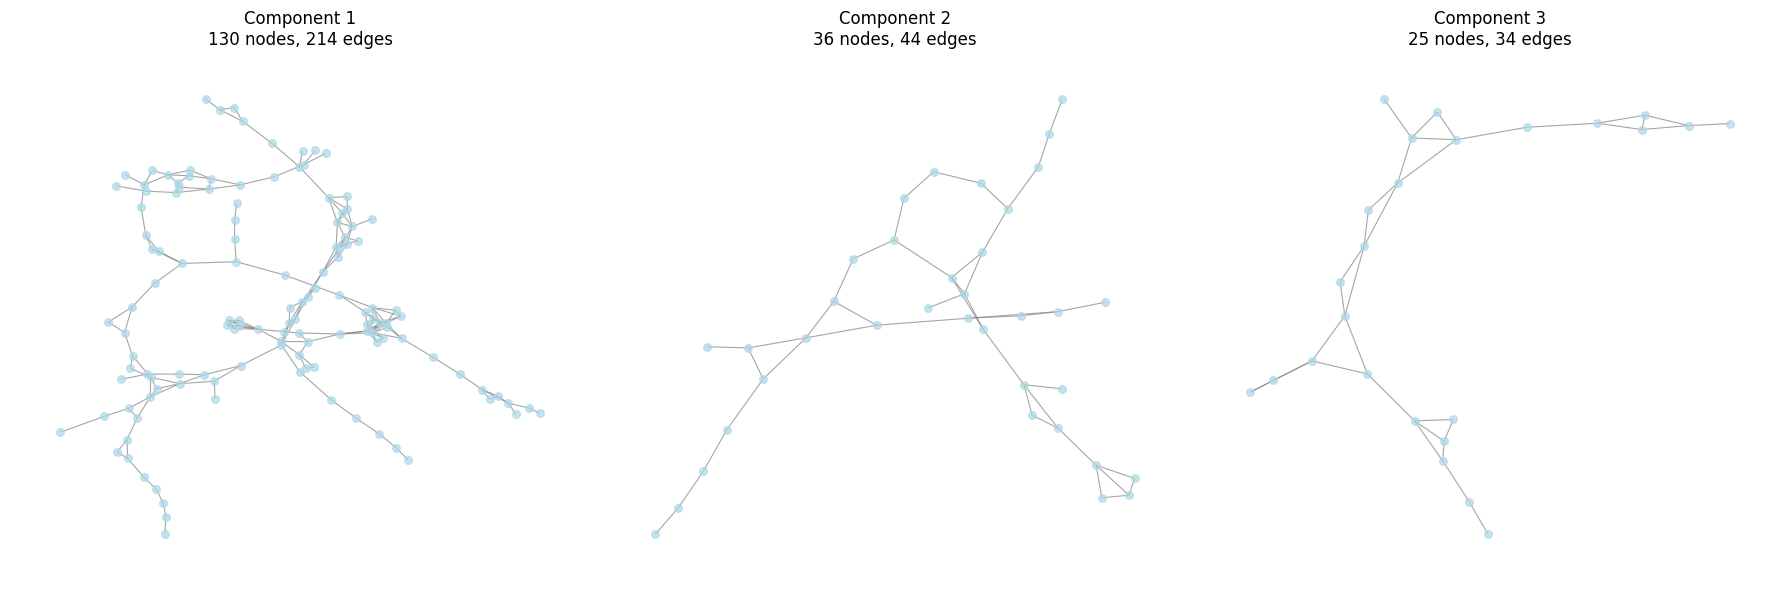

In [12]:
# Visualize the 3 largest connected components
largest_components = sorted(components, key=len, reverse=True)[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, comp in enumerate(largest_components):
    # Create subgraph for this component
    subG = G.subgraph(comp)
    
    # Plot
    ax = axes[idx]
    pos = nx.spring_layout(subG, k=0.5, iterations=50)
    nx.draw(subG, pos, node_size=30, node_color='lightblue', 
            edge_color='gray', alpha=0.7, width=0.8, with_labels=False, ax=ax)
    ax.set_title(f'Component {idx+1}\n{len(comp)} nodes, {subG.number_of_edges()} edges')

plt.tight_layout()
plt.show()

In [18]:
# Get the sizes of the 3 largest components
component_sizes = [len(comp) for comp in largest_components]
total = np.prod(component_sizes)
print(total)

117000


In [16]:
component_sizes

[130, 36, 25]